**Bitcoin ETFs:** \\
Grayscale Bitcoin Trust	              GBTC	    \$22.7B \\
iShares Bitcoin Trust Registered	    IBIT	    \$6.6B \\
Fidelity Wise Origin Bitcoin Fund	    FBTC	    \$4.7B \\
ARK 21Shares Bitcoin ETF	            ARKB	    \$1.6B \\
Bitwise Bitcoin ETF Trust	            BITB	    \$1.2B



In [2]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from itertools import combinations

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#sid's file path
sid_path = '/content/drive/My Drive/ece473/ece473 final project/code/raw_data'
Our_path = '/content/drive/My Drive/raw_data'
# you need to make a copy of the data folder and place it into My drive
#path = (Our_path)ytr
path = Our_path


Minute Data


In [17]:
# Load the Excel file with all sheets
excel_file_path = os.path.join(path, 'Merged_IntraDayData.xlsx')
xl = pd.ExcelFile(excel_file_path)

first_sheet_name = xl.sheet_names[0]
df = xl.parse(first_sheet_name)

# Display the first few rows of the DataFrame
print(df.head())


          Date         BITB1min  IBIT1min  ARKB1min  FBTC1min   BTC1min
0 2024-05-03 15:59:00   33.840    35.360    62.050    54.280   62014.50
1 2024-05-03 15:58:00   33.850    35.385    62.060    54.310   62033.30
2 2024-05-03 15:57:00   33.800    35.325    61.970    54.215   61943.00
3 2024-05-03 15:56:00   33.790    35.315    61.955    54.210   61928.75
4 2024-05-03 15:55:00   33.795    35.315    61.949    54.190   61936.72


In [18]:
combined2 = pd.DataFrame({
    'Date': df['Date'],
    'ARKB': df['ARKB1min'],
    'BITB': df['BITB1min'],
    'FBTC': df['FBTC1min'],
    'IBIT': df['IBIT1min']
})
combined2['Date'] = pd.to_datetime(combined2['Date'])

combined2 = combined2[combined2['Date'] >= pd.Timestamp('2024-01-20')]
combined = combined2[combined2['Date'] >= pd.Timestamp('2024-01-20')]
combined.set_index('Date', inplace=True)

combined_pct_change = combined2.iloc[::-1]
combined_pct_change = combined_pct_change.dropna()

combined_pct_change.reset_index(drop=True, inplace=True)

#combined_pct_change.set_index('Date', inplace=True)

combined_pct_change

,Date,ARKB,BITB,FBTC,IBIT
0,2024-01-22 09:30:00,40.790,22.270,35.610,23.200
1,2024-01-22 09:31:00,40.680,22.195,35.550,23.170
2,2024-01-22 09:32:00,40.730,22.245,35.570,23.195
3,2024-01-22 09:33:00,40.840,22.290,35.700,23.275
4,2024-01-22 09:34:00,40.860,22.315,35.710,23.280
...,...,...,...,...,...
25861,2024-05-03 15:55:00,61.949,33.795,54.190,35.315
25862,2024-05-03 15:56:00,61.955,33.790,54.210,35.315
25863,2024-05-03 15:57:00,61.970,33.800,54.215,35.325
25864,2024-05-03 15:58:00,62.060,33.850,54.310,35.385


In [19]:

numeric_cols = combined_pct_change.select_dtypes(include=[np.number])

initial_values = numeric_cols.iloc[0]

normalized_df = numeric_cols.div(initial_values)

normalized_df['Date'] = combined_pct_change['Date']

normalized_df = normalized_df[['Date'] + [col for col in normalized_df.columns if col != 'Date']]


In [ ]:
normalized_df

,Date,ARKB,BITB,FBTC,IBIT
0,2024-01-22 09:30:00,1.000000,1.000000,1.000000,1.000000
1,2024-01-22 09:31:00,0.997303,0.996632,0.998315,0.998707
2,2024-01-22 09:32:00,0.998529,0.998877,0.998877,0.999784
3,2024-01-22 09:33:00,1.001226,1.000898,1.002527,1.003233
4,2024-01-22 09:34:00,1.001716,1.002021,1.002808,1.003448
...,...,...,...,...,...
25861,2024-05-03 15:55:00,1.518730,1.517512,1.521764,1.522198
25862,2024-05-03 15:56:00,1.518877,1.517288,1.522325,1.522198
25863,2024-05-03 15:57:00,1.519245,1.517737,1.522466,1.522629
25864,2024-05-03 15:58:00,1.521451,1.519982,1.525133,1.525216


In [20]:
ARKB_1min = df['ARKB1min']
BITB_1min = df['BITB1min']
FBTC_1min = df['FBTC1min']
IBIT_1min = df['IBIT1min']
BTC_1min = df['BTC1min']


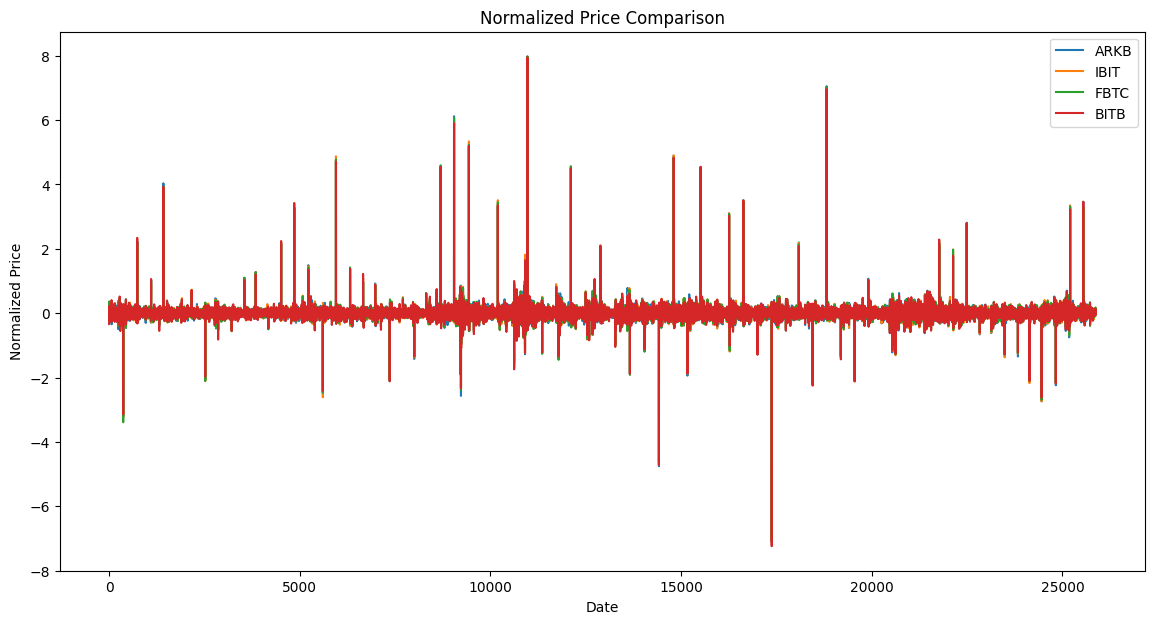

In [21]:



ARKB_pct_change = normalized_df['ARKB'].pct_change() * 100
IBIT_pct_change = normalized_df['IBIT'].pct_change() * 100
FBTC_pct_change = normalized_df['FBTC'].pct_change() * 100
BITB_pct_change = normalized_df['BITB'].pct_change() * 100

plt.figure(figsize=(14, 7))
plt.plot(ARKB_pct_change, label='ARKB')
plt.plot(IBIT_pct_change, label='IBIT')
plt.plot(FBTC_pct_change, label='FBTC')
plt.plot(BITB_pct_change, label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

There is some differnence in returns on some days

In [22]:
import pandas as pd

# Sample data setup (assuming normalized_df is already defined)
# normalized_df = ...

mins = [1, 15, 30, 60, 120, 510]
for min in mins:
    A = normalized_df['ARKB'].rolling(window=min).mean()
    I = normalized_df['IBIT'].rolling(window=min).mean()
    F = normalized_df['FBTC'].rolling(window=min).mean()
    B = normalized_df['BITB'].rolling(window=min).mean()

    ARKB_pct_change = A.pct_change() * 100
    IBIT_pct_change = I.pct_change() * 100
    FBTC_pct_change = F.pct_change() * 100
    BITB_pct_change = B.pct_change() * 100

    Corr_1min = {
        'ARKB': ARKB_pct_change,
        'IBIT': IBIT_pct_change,
        'FBTC': FBTC_pct_change,
        'BITB': BITB_pct_change,
    }

    Corr = pd.DataFrame(Corr_1min)

    # Set display options for better table formatting
    pd.set_option('display.precision', 4)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.expand_frame_repr', False)

    print(f'Correlation Table for {min}-minute Intervals:')
    print(Corr.corr())
    print('\n')  # Add a newline for better separation between tables


Correlation Table for 1-minute Intervals:
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9525  0.9566  0.9440
IBIT  0.9525  1.0000  0.9847  0.9457
FBTC  0.9566  0.9847  1.0000  0.9490
BITB  0.9440  0.9457  0.9490  1.0000


Correlation Table for 15-minute Intervals:
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9963  0.9968  0.9959
IBIT  0.9963  1.0000  0.9986  0.9958
FBTC  0.9968  0.9986  1.0000  0.9962
BITB  0.9959  0.9958  0.9962  1.0000


Correlation Table for 30-minute Intervals:
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9980  0.9983  0.9978
IBIT  0.9980  1.0000  0.9992  0.9978
FBTC  0.9983  0.9992  1.0000  0.9980
BITB  0.9978  0.9978  0.9980  1.0000


Correlation Table for 60-minute Intervals:
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9989  0.9991  0.9988
IBIT  0.9989  1.0000  0.9995  0.9988
FBTC  0.9991  0.9995  1.0000  0.9989
BITB  0.9988  0.9988  0.9989  1.0000


Correlation Table for 120-minute Intervals:
       ARKB    IBIT    FBTC    BITB 


In [23]:
mins = [1, 15, 30, 60, 120, 510]
for min in mins:
    A = normalized_df['ARKB'].rolling(window=min).mean()
    I = normalized_df['IBIT'].rolling(window=min).mean()
    F = normalized_df['FBTC'].rolling(window=min).mean()
    B = normalized_df['BITB'].rolling(window=min).mean()

    ARKB_pct_change = A.pct_change() * 100
    IBIT_pct_change = I.pct_change() * 100
    FBTC_pct_change = F.pct_change() * 100
    BITB_pct_change = B.pct_change() * 100



    Corr_1min = {
        'ARKB': ARKB_pct_change ,
        'IBIT': IBIT_pct_change,
        'FBTC': FBTC_pct_change,
        'BITB': BITB_pct_change,

    }

    Corr = pd.DataFrame(Corr_1min)
    print('minutes: ', min)
    print(Corr.corr())



minutes:  1
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9525  0.9566  0.9440
IBIT  0.9525  1.0000  0.9847  0.9457
FBTC  0.9566  0.9847  1.0000  0.9490
BITB  0.9440  0.9457  0.9490  1.0000
minutes:  15
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9963  0.9968  0.9959
IBIT  0.9963  1.0000  0.9986  0.9958
FBTC  0.9968  0.9986  1.0000  0.9962
BITB  0.9959  0.9958  0.9962  1.0000
minutes:  30
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9980  0.9983  0.9978
IBIT  0.9980  1.0000  0.9992  0.9978
FBTC  0.9983  0.9992  1.0000  0.9980
BITB  0.9978  0.9978  0.9980  1.0000
minutes:  60
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9989  0.9991  0.9988
IBIT  0.9989  1.0000  0.9995  0.9988
FBTC  0.9991  0.9995  1.0000  0.9989
BITB  0.9988  0.9988  0.9989  1.0000
minutes:  120
       ARKB    IBIT    FBTC    BITB 
ARKB  1.0000  0.9994  0.9995  0.9994
IBIT  0.9994  1.0000  0.9997  0.9993
FBTC  0.9995  0.9997  1.0000  0.9994
BITB  0.9994  0.9993  0.9994  1.0000
minutes:  

As we can see, the the etfs are least correlated at the open, and reach almost perfect correlation by the end of day

In [24]:
normalized_df['Date'] = pd.to_datetime(normalized_df['Date']).dt.date

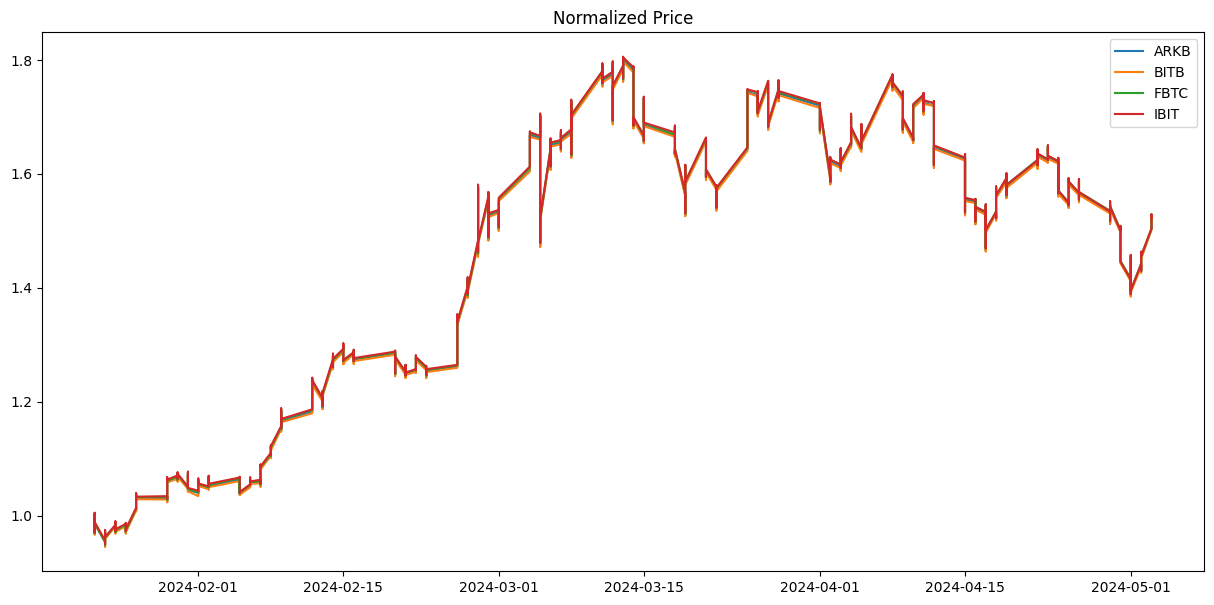

In [25]:
plt.figure(figsize=(15, 7))  # Width, height in inches

# Plotting data
plt.plot(normalized_df['Date'], normalized_df['ARKB'], label='ARKB')
plt.plot(normalized_df['Date'],normalized_df['BITB'], label='BITB')
plt.plot(normalized_df['Date'],normalized_df['FBTC'], label='FBTC')
plt.plot(normalized_df['Date'],normalized_df['IBIT'], label='IBIT')

# Adding a legend to the plot
plt.legend()
plt.title('Normalized Price')
# Display the plot
plt.show()

In [26]:
combined_pct_change = normalized_df.copy()
stocks = list(combined_pct_change.columns[1:])  # exclude the 'Date' column
pairs = list(combinations(stocks, 2))

0.0018531351373876263

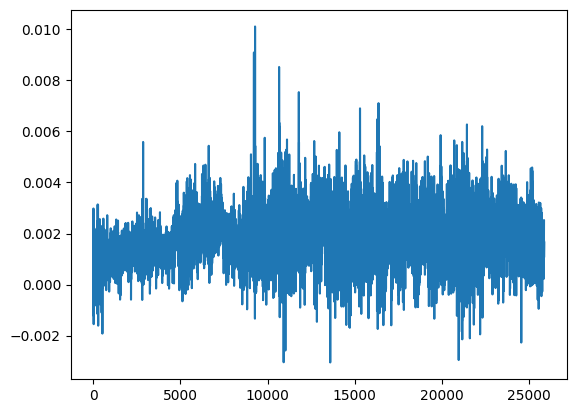

In [27]:
SPREAD = normalized_df['ARKB'] - normalized_df['BITB']

plt.plot(SPREAD)
SPREAD.mean()

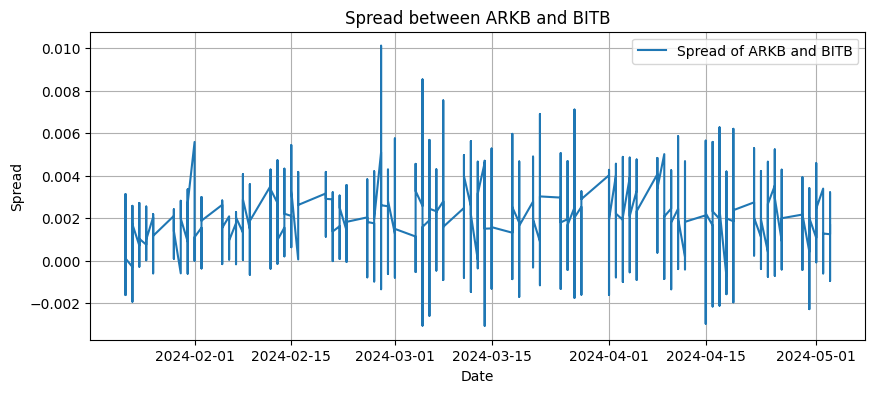

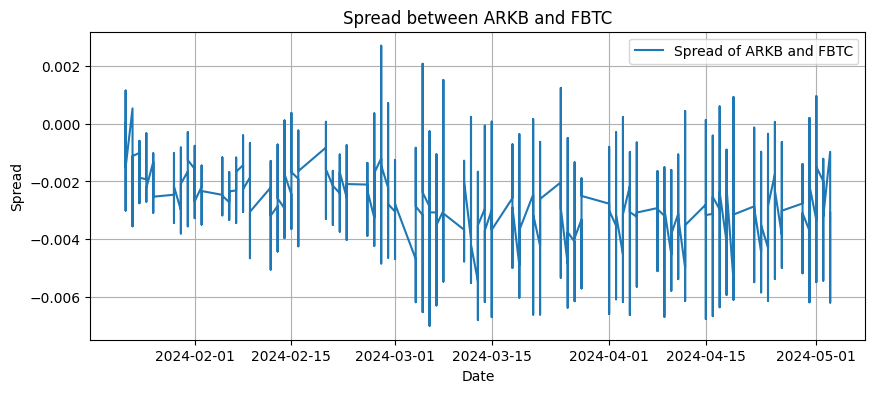

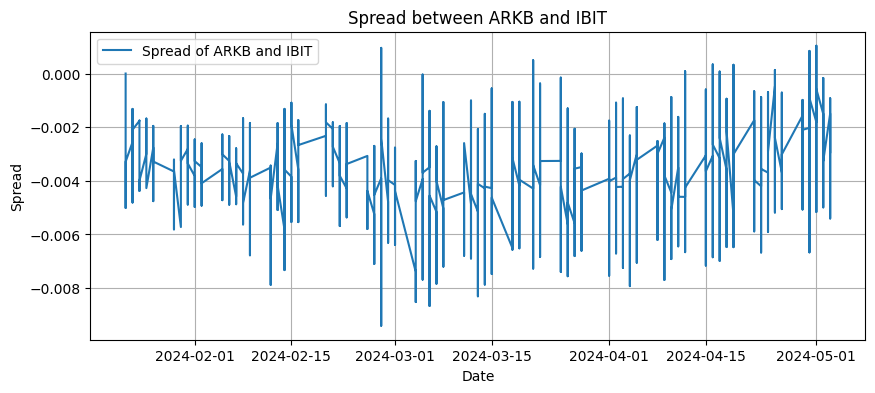

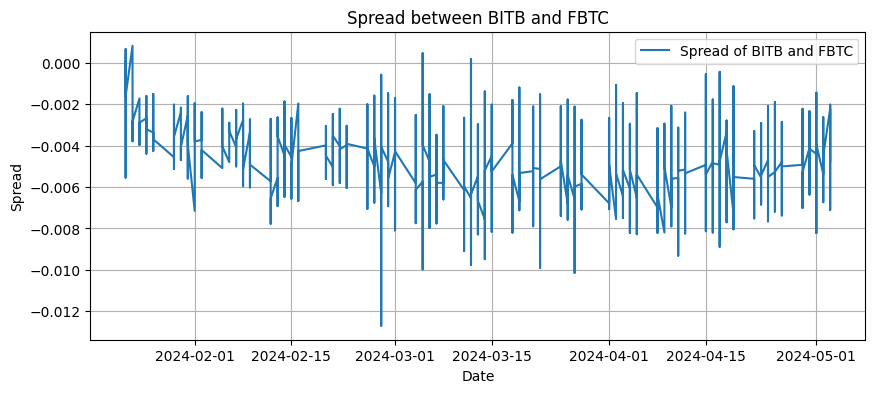

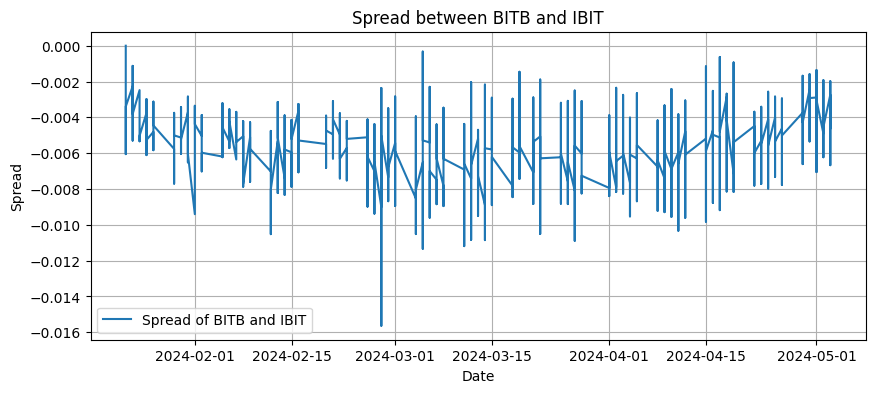

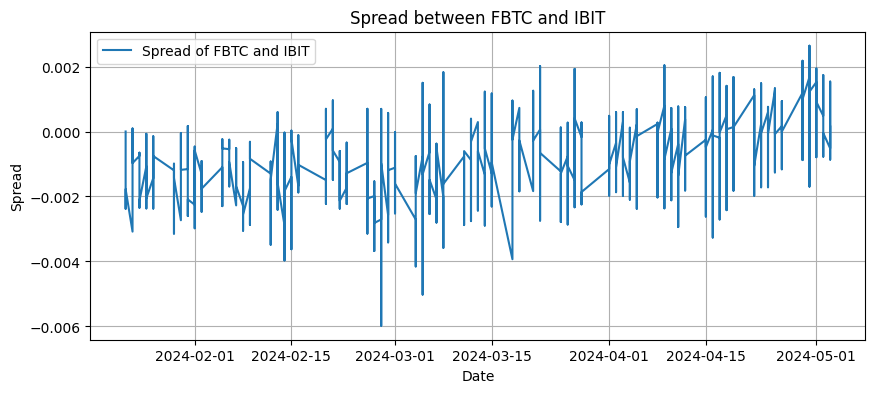

In [28]:
for stock1, stock2 in pairs:
    spread_column_name = f'Spread_{stock1}_{stock2}'
    combined_pct_change[spread_column_name] = normalized_df[stock1] - normalized_df[stock2]


    # Optionally, you can plot each spread
    plt.figure(figsize=(10, 4))
    plt.plot(combined_pct_change['Date'], combined_pct_change[spread_column_name], label=f'Spread of {stock1} and {stock2}')
    plt.title(f'Spread between {stock1} and {stock2}')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    plt.show()

You can see that the spread reverts back to its steady-state

In [29]:
results = {pair: [] for pair in pairs}
for date in normalized_df['Date'].unique():
  dfs = normalized_df[normalized_df['Date'] == date]

  #y = filtered_data.reset_index(drop = True)

  cum_sum = dfs.copy()
  cum_sum = cum_sum.reset_index(drop = True)

  #plt.plot(np.linspace(0, len(cum_sum['ARKB']), len(cum_sum['ARKB'])), cum_sum['ARKB'], label = 'ARKB')
  #plt.plot(np.linspace(0, len(cum_sum['BITB']), len(cum_sum['BITB'])), cum_sum['BITB'], label = 'BITB')
  #plt.plot(np.linspace(0, len(cum_sum['ARKB']), len(cum_sum['ARKB'])), cum_sum['ARKB'] - cum_sum['BITB'])
  #plt.legend()
  #plt.show()

  spread = cum_sum['ARKB'] - cum_sum['BITB']

  for pair in pairs:
        stock1, stock2 = pair


        # Get the opening prices (assuming the first entry is the open price)
        open_price1 = cum_sum[stock1].iloc[0]
        open_price2 = cum_sum[stock2].iloc[0]

        spread_open = abs(cum_sum[stock1].iloc[0] - cum_sum[stock2].iloc[0])

        close_price1 = cum_sum[stock1].iloc[-1]
        close_price2 = cum_sum[stock2].iloc[-1]

        spread_close = abs(cum_sum[stock1].iloc[-1] - cum_sum[stock2].iloc[-1])


        if open_price1 > open_price2:
          short, longs = stock1, stock2
          # You gain on stock2 increasing and on stock1 decreasing
          ret = ((close_price2 - open_price2)/open_price2) + ((open_price1 - close_price1)/close_price1)
        else:
          short, longs = stock2, stock1
          # You gain on stock1 increasing and on stock2 decreasing
          ret = ((close_price1 - open_price1)/open_price1 + (open_price2 - close_price2)/close_price2)



        # Store the decision
        results[pair].append({
            'Date': date,
            'Long': longs,
            'Short': short,
            'Open Prices': {stock1: open_price1, stock2: open_price2},
            'closing_prices': {stock1: close_price1, stock2: close_price2},
            'return': ret,
            'spread open': spread_open,
            'spread close': spread_close


        })

# Convert the results into a structured format
for pair, data in results.items():
    results[pair] = pd.DataFrame(data)
    results[pair] = results[pair].sort_values(by='Date', ascending=True)
    results[pair].reset_index(inplace = True, drop = True)



In [40]:
((1.055**(1/365)) - 1)

0.0001466977917483625

Statistics for ('ARKB', 'BITB'):
Average Return: 0.1758
Standard Deviation: 0.0258
Sharpe Ratio: 6.8288


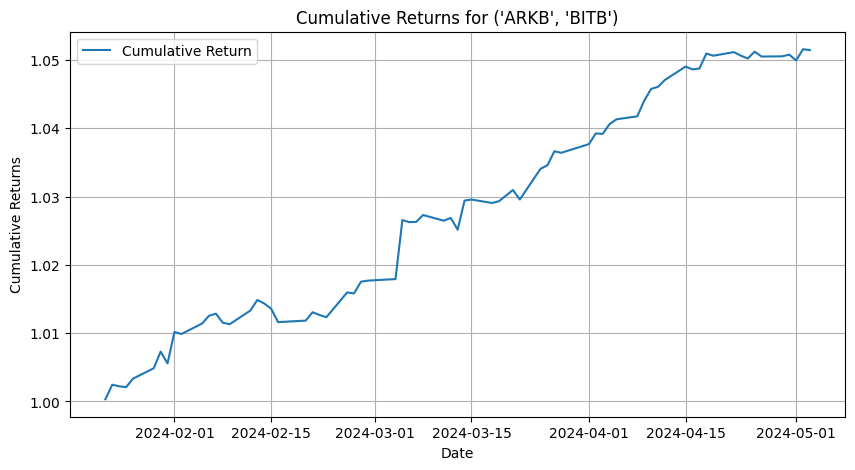

Statistics for ('ARKB', 'FBTC'):
Average Return: 0.1748
Standard Deviation: 0.0213
Sharpe Ratio: 8.2280


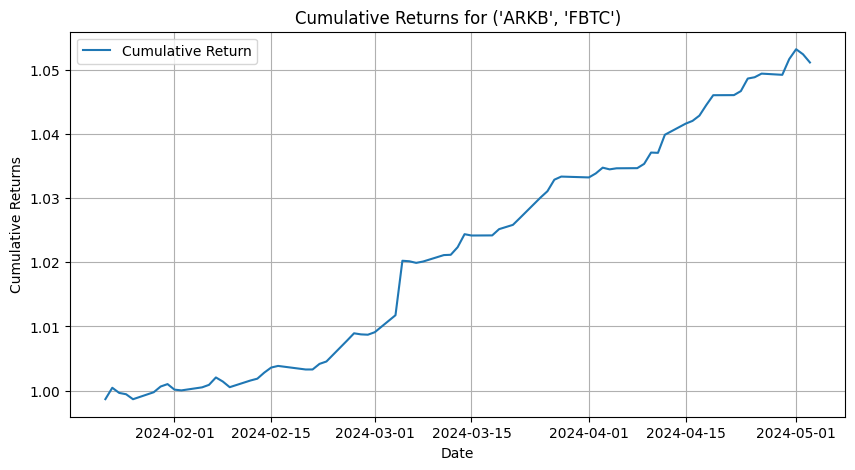

Statistics for ('ARKB', 'IBIT'):
Average Return: 0.1549
Standard Deviation: 0.0233
Sharpe Ratio: 6.6474


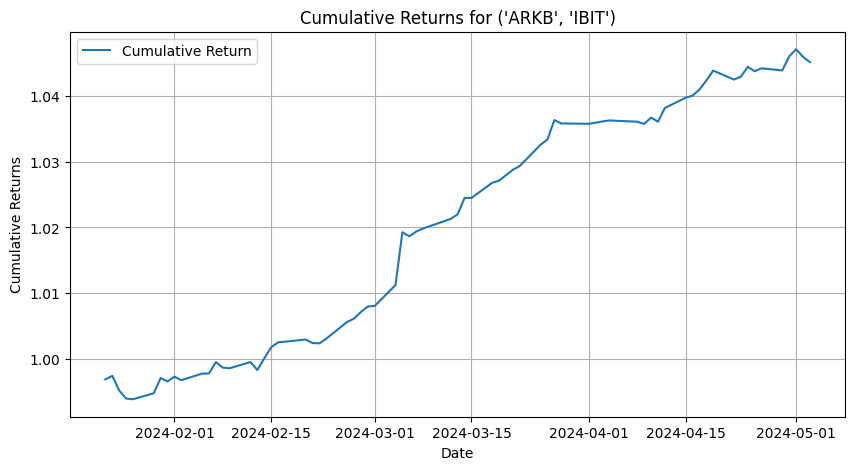

Statistics for ('BITB', 'FBTC'):
Average Return: 0.1810
Standard Deviation: 0.0256
Sharpe Ratio: 7.0700


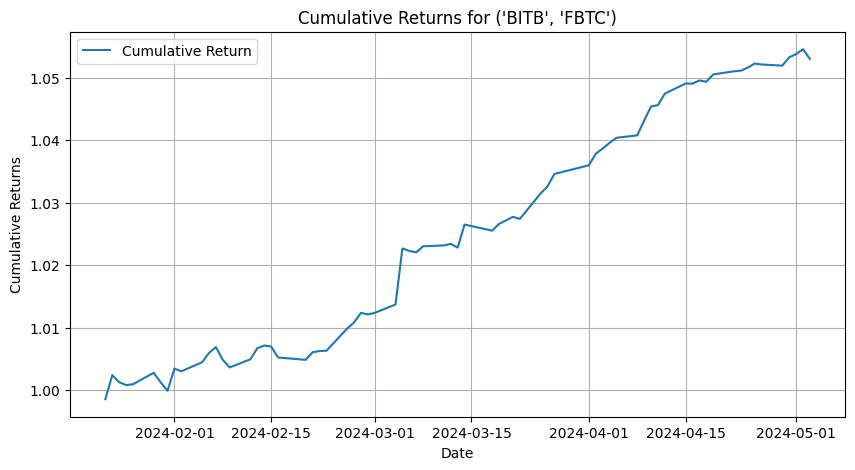

Statistics for ('BITB', 'IBIT'):
Average Return: 0.1464
Standard Deviation: 0.0275
Sharpe Ratio: 5.3223


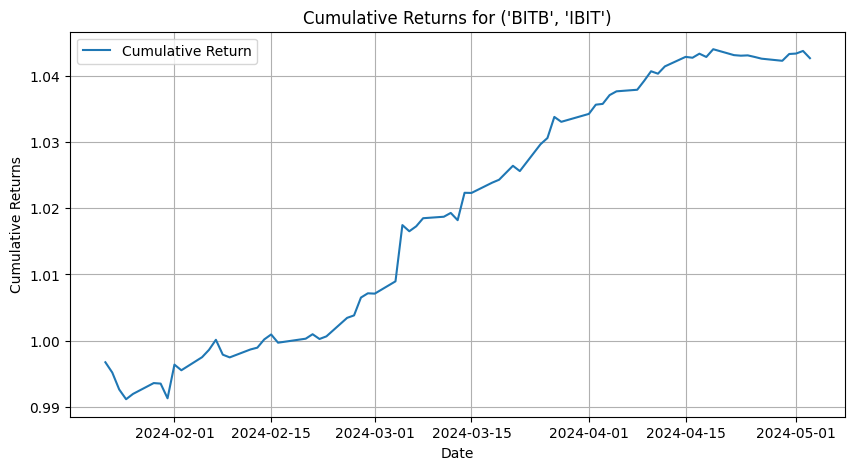

Statistics for ('FBTC', 'IBIT'):
Average Return: 0.2136
Standard Deviation: 0.0210
Sharpe Ratio: 10.1945


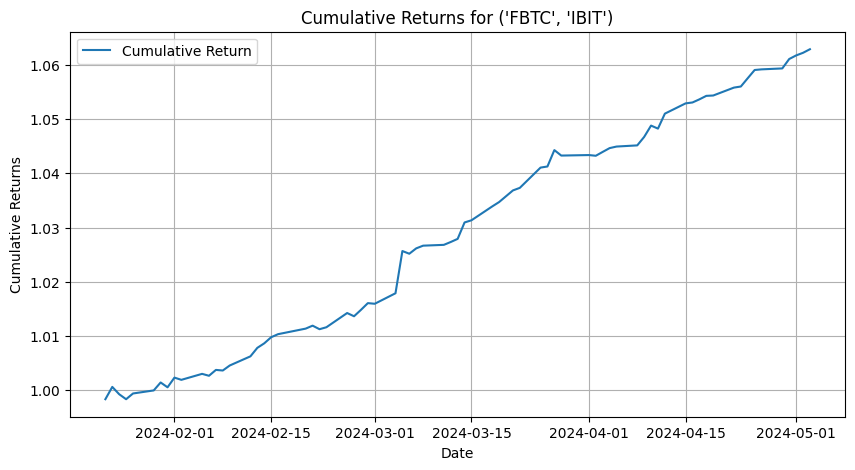

In [41]:



for pair in pairs:
    p = results[pair]



    # Calculate cumulative returns
    p['Cumulative Return'] = (p['return'] + 1).cumprod()

    daily_ret_mean = p['return'].mean()
    daily_ret_std = p['return'].std()

    # Annualize the mean return
    annualized_return = daily_ret_mean * 252 - ((1.055**(1/365)) - 1)

    # Annualize the standard deviation (volatility)
    annualized_volatility = daily_ret_std * np.sqrt(252)

    if daily_ret_std != 0:
        sharpe_ratio = (daily_ret_mean / daily_ret_std) * np.sqrt(252)
    else:
        sharpe_ratio = 0  # Handling the zero volatility case, possibly by setting Sharpe ratio to zero or some neutral value



    info = {
        'Average Return': annualized_return,
        'Standard Deviation': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio# (annualized_return - 0.0525)/ annualized_volatility

    }

    # Print pair and its statistics
    print(f"Statistics for {pair}:")
    for key, value in info.items():
        print(f"{key}: {value:.4f}")


    # Plotting cumulative returns
    plt.figure(figsize=(10, 5))
    plt.plot(p['Date'], p['Cumulative Return'], label='Cumulative Return')
    plt.title(f"Cumulative Returns for {pair}")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()


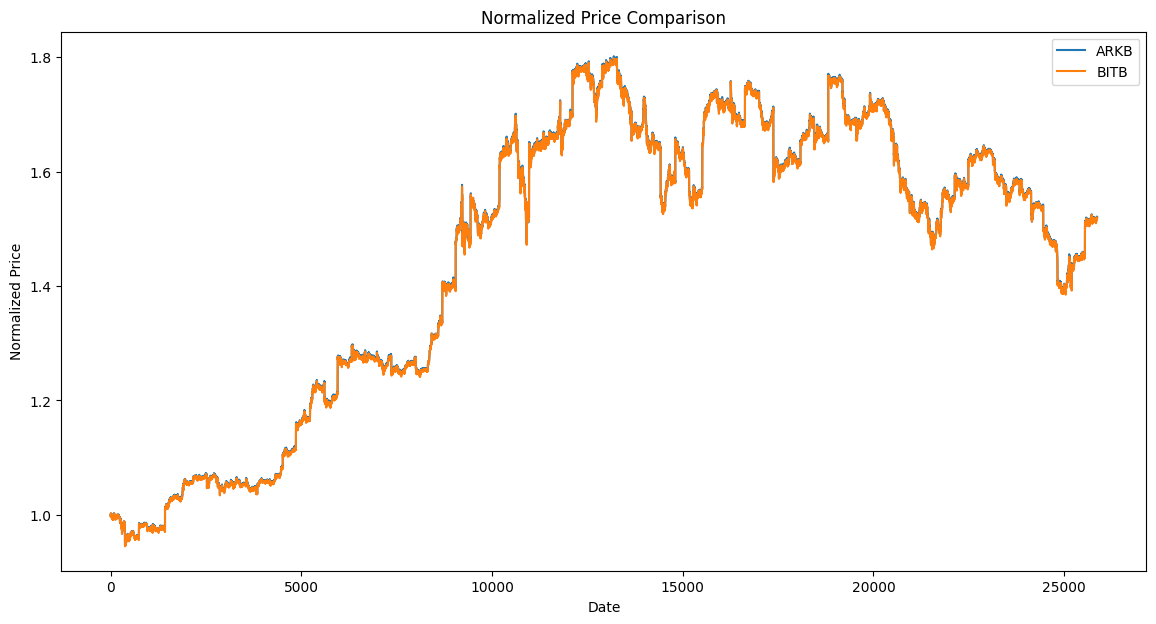

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(combined_pct_change['ARKB'], label='ARKB')
plt.plot(combined_pct_change['BITB'], label='BITB')
#plt.plot(combined_pct_change['FBTC'], label='FBTC')
#plt.plot(combined_pct_change['BITB'], label='BITB')
# plt.plot(BTC_pct_change, label='BTC')
plt.title('Normalized Price Comparison')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()